# Amount Spend by a User on an E-Commerce Website
In this machine learning project, I have collected the dataset from Kaggle (https://www.kaggle.com/iyadavvaibhav/ecommerce-customer-device-usage?select=Ecommerce+Customers) and I will be using Machine Learning to make predictions of amount spent by a user on E-commerce Website. Later, in order to apply the information gained in this study in real life, a GUI application was made using tkinter of python which takes in required parameters from the user and then displays the predcited amount spent by the user on E-commerce Website.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

## Loading Dataset
Now I will load the dataset which I have stored in the local directory with the name 'Ecommerce_customers'.

In [2]:
#Loading dataset
dataset = pd.read_csv("Ecommerce_customers")

## Data Exploration

In [3]:
print(f"Dimensions of dataset: {dataset.shape}")

Dimensions of dataset: (500, 8)


In [4]:
dataset.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
print("Statistics of dataset: ")
dataset.describe()

Statistics of dataset: 


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Data Visualization
In order to better understand the data, I will be using data visualization techniques like histogram and heatmaps.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D84E3B1C48>,
      dtype=object)

<Figure size 1440x1440 with 0 Axes>

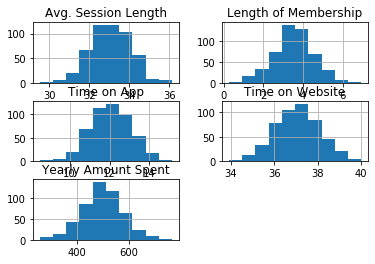

In [7]:
#Histogram
plt.figure(figsize = (20,20))
dataset.hist()

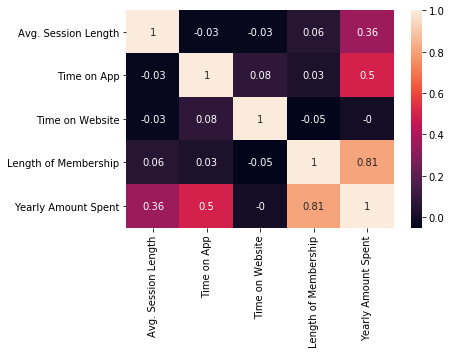

In [8]:
#Heatmap
correlation_matrix = dataset.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True)

## Data Pre-Processing
As the columns of email, address and avatar do not affect the target variable, we do not include them in the list of independent variables. Here, we will split the dataset into independent and dependent variables and then split it into train and test data.

In [9]:
X = dataset.values[:,3:7]
Y = dataset.values[:, 7:]
print(f"Shape of X: {X.shape}")
print(f"Shape of Y: {Y.shape}")
#Splitting the dataset into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

Shape of X: (500, 4)
Shape of Y: (500, 1)


## Machine Learning Models

#### Linear Regression Model

In [10]:
lrm = TransformedTargetRegressor(regressor = LinearRegression(), transformer = StandardScaler())
lrm.fit(X_train, Y_train)
predict = lrm.predict(X_test)
lrm_score = mean_squared_error(Y_test, predict)
#out = np.concatenate((Y_test, predict), axis=1)
#print(out)

In [11]:
print("The mean square error for Linear Regression Model is %.2f." %(lrm_score.round(2)))

The mean square error for Linear Regression Model is 92.89.


#### Polynomial Regression Model

In [12]:
polynomial_scores = []
for i in range(2,6):
    polynomial = PolynomialFeatures(degree = i)
    X_poly_train = polynomial.fit_transform(X_train)
    X_poly_test = polynomial.fit_transform(X_test)
    prm = TransformedTargetRegressor(regressor = LinearRegression(), transformer = StandardScaler())
    prm.fit(X_poly_train, Y_train)
    predict = prm.predict(X_poly_test)
    polynomial_scores.append(mean_squared_error(Y_test, predict))
pmr_score = polynomial_scores[0]

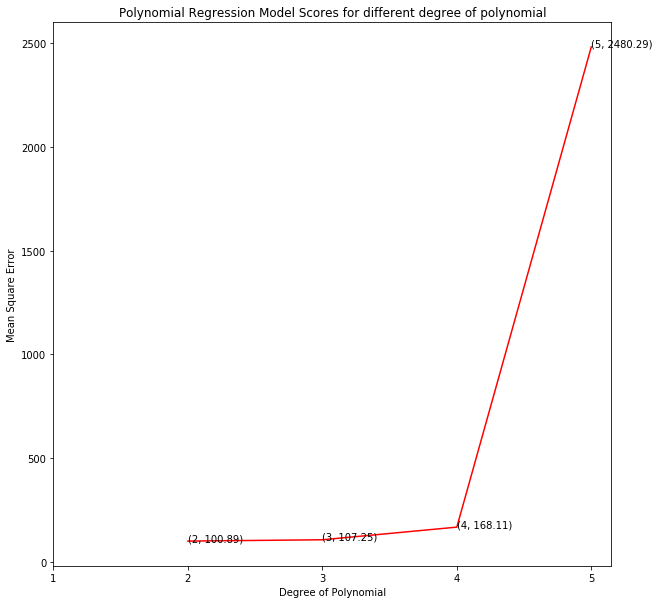

In [13]:
#Plotting the graph between different degree of polynomial vs mean square error
plt.figure(figsize = (10, 10))
plt.plot([i for i in range(2,6)], polynomial_scores, color = 'red')
for i in range(2,6):
    plt.text(i, polynomial_scores[i-2], (i, polynomial_scores[i-2].round(2)))
plt.xticks([i for i in range(1,6)])
plt.xlabel("Degree of Polynomial")
plt.ylabel("Mean Square Error")
plt.title("Polynomial Regression Model Scores for different degree of polynomial")
plt.show()

In [14]:
print("The mean square error for Polynomial Regression Model is %.2f." %(polynomial_scores[0].round(2)))

The mean square error for Polynomial Regression Model is 100.89.


#### Support Vector Regression Model

In [15]:
svr_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svr = TransformedTargetRegressor(regressor = SVR(kernel = kernels[i]), transformer = StandardScaler())
    svr.fit(X_train, Y_train)
    predict = svr.predict(X_test)
    svr_scores.append(mean_squared_error(Y_test, predict))

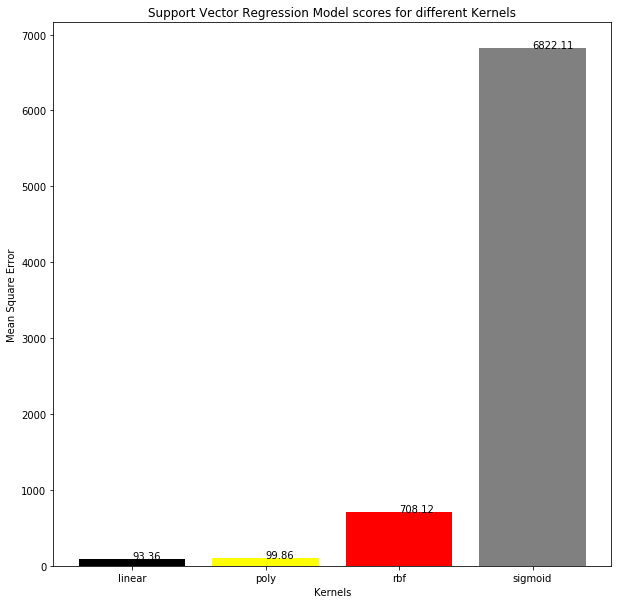

In [16]:
#Plotting the bar grapgh for Support Vector Classifier for different kernels vs mean square error
plt.figure(figsize=(10,10))
plt.bar(kernels, svr_scores, color=['black', 'yellow', 'red', 'grey'])
for i in range(len(kernels)):
    plt.text(i, svr_scores[i], (svr_scores[i].round(2)))
plt.title('Support Vector Regression Model scores for different Kernels')
plt.xlabel('Kernels')
plt.ylabel('Mean Square Error')
svr_score = svr_scores[0]

In [17]:
print("The mean square error for Support Vector Regression Model is {} with {} kernel.".format(svr_scores[0].round(2), 'linear'))

The mean square error for Support Vector Regression Model is 93.36 with linear kernel.


#### Random Forest Regression Model

In [18]:
rf_scores = []
estimators = [1, 10, 50 ,100, 500, 1000, 5000]
for i in range(len(estimators)):
    rf = TransformedTargetRegressor(regressor = RandomForestRegressor(n_estimators = estimators[i]), transformer = StandardScaler())
    rf.fit(X_train, Y_train)
    predict = rf.predict(X_test)
    rf_scores.append(mean_squared_error(Y_test, predict))

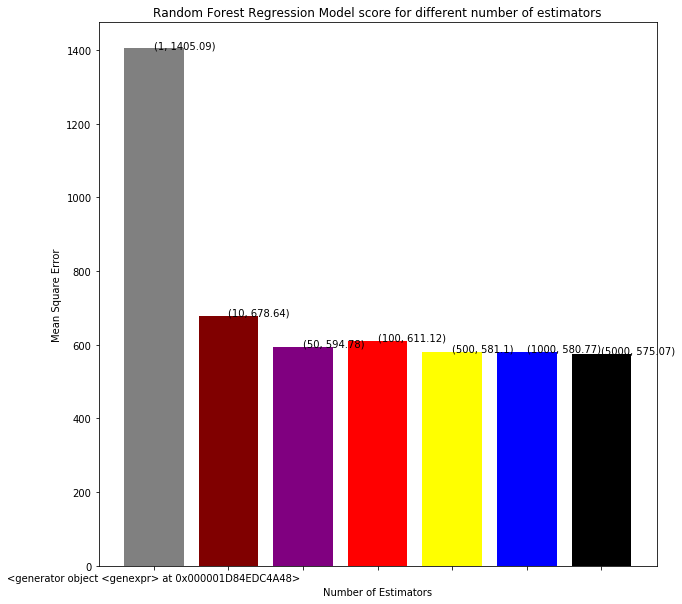

In [19]:
#Plotting the bar graph for Random Forest Regression Model scores for different kernels
plt.figure(figsize=(10,10))
plt.bar([i for i in range(len(estimators))], rf_scores, color=['grey', 'maroon', 'purple', 'red', 'yellow', 'blue', 'black'], width=0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], (estimators[i], rf_scores[i].round(2)))
plt.xticks([i for i in range(len(estimators))], labels=[str(estimators[i] for i in estimators)])
plt.title('Random Forest Regression Model score for different number of estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Square Error')
rf_score = rf_scores[6]

In [20]:
print("The mean sqaure error for Random Forest Regression Model is {} with {} estimators.".format(rf_scores[6].round(2), 5000))

The mean sqaure error for Random Forest Regression Model is 575.07 with 5000 estimators.


## Final Scores

In [21]:
print("The mean square error for Linear Regression Model is %.2f." %(lrm_score.round(2)))
print("The mean square error for Polynomial Regression Model is %.2f." %(polynomial_scores[0].round(2)))
print("The mean square error for Support Vector Regression Model is {} with {} kernel.".format(svr_scores[0].round(2), 'linear'))
print("The mean sqaure error for Random Forest Regression Model is {} with {} estimators.".format(rf_scores[6].round(2), 5000))

The mean square error for Linear Regression Model is 92.89.
The mean square error for Polynomial Regression Model is 100.89.
The mean square error for Support Vector Regression Model is 93.36 with linear kernel.
The mean sqaure error for Random Forest Regression Model is 575.07 with 5000 estimators.


## Conclusion
In this project, I applied machine learning models to predict the amount spent by a user on an E-Commerce Website. After importing the data, I used data visualization techniques for data exploration. Then, I applied 4 machine learning models namely Linear Regressor, Polynomial Regressor, Support Vector Regressor and Random Forest Regressor. I varied parameters in each model to achieve best scores. Finally, Linear Regression Model achieved the least mean square error of 92.89.

#### Final Model

In [22]:
final_model = TransformedTargetRegressor(regressor = LinearRegression(), transformer = StandardScaler())
final_model.fit(X_train, Y_train)
predict = final_model.predict(X_test)
final_model_score = mean_squared_error(Y_test, predict)
print(f"Model Mean Square Error: {final_model_score.round(2)}")

Model Mean Square Error: 92.89


#### Predictor Function
Creating a function that will later be used to predict the amount spent by a user on an E-Commerce Webiste using Linear Regression model.

In [23]:
def predict_now(lis):
    lis = pd.DataFrame(lis)
    return final_model.predict(lis).item()
#lis = {'Avg. Session Length': [34.497268], 'Time on App': [12.655651], 'Time on Website': [39.577668], 'Length of Membership': [4.082621]}
#predict_now(lis)

## Amount Spent on E-Commerce Website Predictor Application
In order to use the above created machine learning model to predict the amount spent by a user on an E-Commerce Webiste using Linear Regression model, we need to build a Graphical User Interface (GUI) wherein the user can enter the required data and get a prediction. I have done this using tkinter GUI of python.

#### Importing Libraries

In [24]:
import tkinter as tk
from tkinter import ttk

#### Defining Required Functions

In [25]:
def submit(*args):
    try:
        final = {
            'Avg. Session Length': [float(user4.get())], 
            'Time on App': [float(user5.get())], 
            'Time on Website': [float(user6.get())], 
            'Length of Membership': [float(user7.get())],
            }
        result = predict_now(final)
        this.set(f"Predicted amount spent by the user on E-Commerce Website is {result}")
    except ValueError:
        pass

#### Setting Up the Window

In [26]:
try:    
    from ctypes import windll
    windll.shcore.SetProcessDPIAwareness(1)
except:
    pass

root = tk.Tk()
root.title("Heart Disease Predictor")

user1 = tk.StringVar()
user2 = tk.StringVar()
user3 = tk.StringVar()
user4 = tk.StringVar()
user5 = tk.StringVar()
user6 = tk.StringVar()
user7 = tk.StringVar()
this = tk.StringVar(value = "Submit to get the result.")

main = ttk.Frame(root, padding = (30, 10))
main.grid()

#### Declaring Widgets

In [27]:
label1 = ttk.Label(main, text = "Enter the following details: ")
label1.configure(font=("helvetica", 15))
label1.grid(row = 0, column = 0, sticky = "w")

entry1 = ttk.Label(main, text = "Email: ")
user_input1 = ttk.Entry(main, width = 20, textvariable = user1)

entry2 = ttk.Label(main, text = "Address: ")
user_input2 = ttk.Entry(main, width = 50, textvariable = user2)

entry3 = ttk.Label(main, text = "Avatar: ")
user_input3 = ttk.Entry(main, width = 20, textvariable = user3)

entry4 = ttk.Label(main, text = "Avg. Session Length: ")
user_input4 = ttk.Entry(main, width = 10, textvariable = user4)

entry5 = ttk.Label(main, text = "Time on App: ")
user_input5 = ttk.Entry(main, width = 10, textvariable = user5)

entry6 = ttk.Label(main, text = "Time on Website: ")
user_input6 = ttk.Entry(main, width = 10, textvariable = user6)

entry7 = ttk.Label(main, text = "Length of Membership: ")
user_input7 = ttk.Entry(main, width = 10, textvariable = user7)

button = ttk.Button(main, text = "Submit", command = submit)

out = ttk.Label(main, textvariable = this)

#### Displaying the Widgets

In [28]:
entry1.grid(row = 1, column = 0, sticky = "w", padx = 10, pady = 10)
user_input1.grid(row = 1, column = 1, sticky = "ew", padx = 10, pady = 10, columnspan = 4)
user_input1.focus()

entry2.grid(row = 2, column = 0, sticky = "w", padx = 10, pady = 10)
user_input2.grid(row = 2, column = 1, sticky = "ew", padx = 10, pady = 10)

entry3.grid(row = 3, column = 0, sticky = "w", padx = 10, pady = 10)
user_input3.grid(row = 3, column = 1, sticky = "ew", padx = 10, pady = 10)

entry4.grid(row = 4, column = 0, sticky = "w", padx = 10, pady = 10)
user_input4.grid(row = 4, column = 1, sticky = "ew", padx = 10, pady = 10, columnspan = 4)

entry5.grid(row = 5, column = 0, sticky = "w", padx = 10, pady = 10)
user_input5.grid(row = 5, column = 1, sticky = "ew", padx = 10, pady = 10, columnspan = 4)

entry6.grid(row = 6, column = 0, sticky = "w", padx = 10, pady = 10)
user_input6.grid(row = 6, column = 1, sticky = "ew", padx = 10, pady = 10)

entry7.grid(row = 7, column = 0, sticky = "w", padx = 10, pady = 10)
user_input7.grid(row = 7, column = 1, sticky = "ew", padx = 10, pady = 10)

button.grid(row = 8, column = 0, columnspan = 2, sticky = "ew", padx = 10, pady = 10)

out.grid(row = 9, column = 0, columnspan = 2)

root.mainloop()